# Import Librerie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import uuid


def outputExperiment(series, model, rmse, offset, view, image_id):
    with open("timesynth_experiment/log.txt", 'a') as f:
        result = ", ".join(map(str, list([series, model, rmse , offset , view, image_id])))
        print(result, file=f)

# Import Moduli Framework

In [2]:
from src.pipeline import Use_ARConvolutionalNeuralNetwork, Use_ARLinearRegression, Use_ARLongShortTermMemoryNeuralNetwork, Use_ARMultiLayerPerceptronNeuralNetwork, Use_ARSupportVectorRegressionLinear, Use_ARSupportVectorRegressionRBF
from src.util import ForecastingGoal, OneStepForecastingGoal, OneShotForecastingGoal
from src.performer import SlidingWindowPerformer, MinMaxTransformer, DataFrameToSeriesTransformer
from src.util.evaluation import ForecastErrorEvaluation

# Serie Sintetica SD1

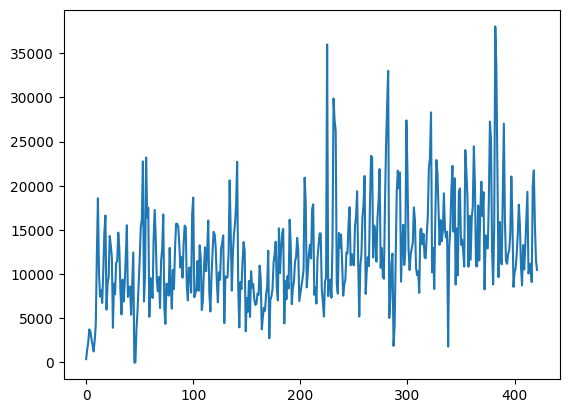

In [3]:
df = pd.read_csv("datasets/CASHPOINT_ID_5.csv")
sd1 = df["SERIES1"]
MAX = sd1.max()
MIN = sd1.min()
MEAN = sd1.mean()
plt.plot(sd1)
sd1 = MinMaxTransformer.transform(sd1.to_numpy())
size_sd1 = int(len(sd1) * .8)
test_sd1= sd1[size_sd1::]
sd1 = sd1[0:size_sd1]

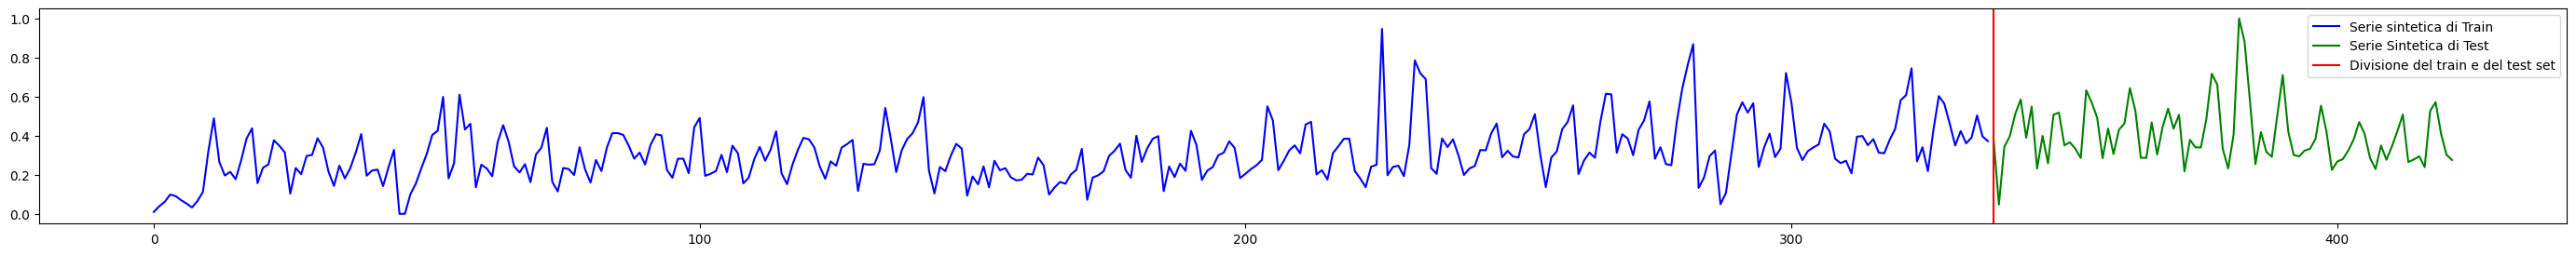

In [4]:
plt.figure(figsize=(35,3))
plt.plot(sd1, 'blue')
plt.plot(np.arange(len(test_sd1))+len(sd1), test_sd1, 'g')
plt.axvline(x=len(sd1), color="red")
plt.legend(["Serie sintetica di Train", "Serie Sintetica di Test", "Divisione del train e del test set"])

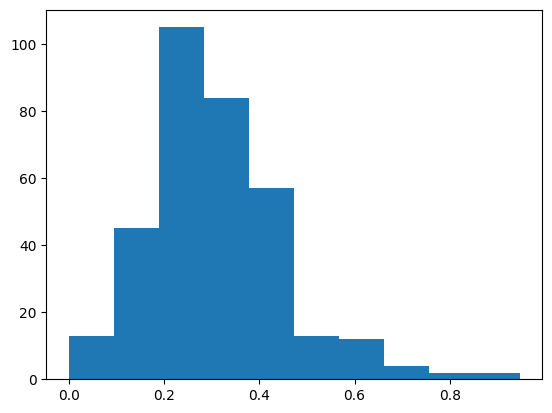

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

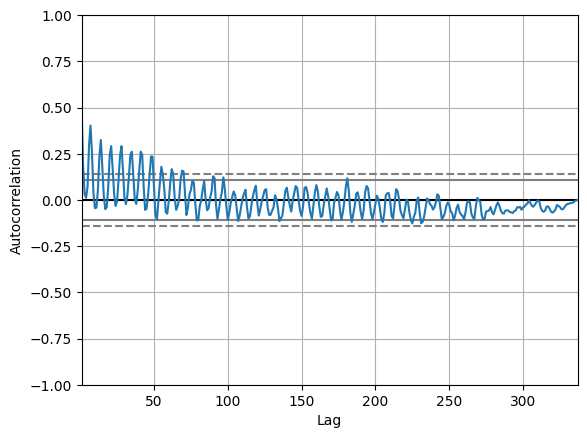

In [5]:
plt.hist(sd1)
plt.show()
pd.plotting.autocorrelation_plot(sd1)

# Serie Sintetica SD2

In [ ]:
# df2 = pd.read_csv("synthetic_dataset/sd2.csv")
# sd2 = df2["sd2(t)"]
# sd2 = MinMaxTransformer.transform(sd2.to_numpy())
# size_sd2 = int(len(sd2) * .8)
# test_sd2 = sd2[size_sd2::]
# sd2 = sd2[0:size_sd2]

In [ ]:
# plt.figure(figsize=(35,3))
# plt.plot(sd2, 'blue')
# plt.plot(np.arange(len(test_sd2))+len(sd2), test_sd2, 'g')
# plt.axvline(x=len(sd2), color="red")
# plt.legend(["Serie sintetica di Train", "Serie Sintetica di Test", "Divisione del train e del test set"])

In [ ]:
# plt.hist(sd2)
# plt.show()
# pd.plotting.autocorrelation_plot(sd2)

# One Step Forecasting

In [7]:
offset = 3
series = sd1
test_series = test_sd1
size = size_sd1
goal = OneStepForecastingGoal(offset=offset)

## Esecuzione del Framework

### AR Linear Regression

In [8]:
ar_linear_regression, ar_linear_regression_parameters, ar_linear_regression_loss = Use_ARLinearRegression().__execute__(series = series, goal=goal)
ar_linear_regression_loss = f'{ar_linear_regression_loss:.5f}'
fl = ar_linear_regression_parameters['feature_length']
print("RMSE:", ar_linear_regression_loss)
print("AR LAG VARIABLES SIZE:", fl)

RMSE: 0.13529
AR LAG VARIABLES SIZE: 8


In [9]:
SWP = SlidingWindowPerformer(feature_length=fl, target_length=1, target_offset=offset)
_, Xt, Yt = SWP.get(series)
_, X, Y = SWP.get(test_series)
yhat_train = ar_linear_regression.__test__(Xt)
yhat = ar_linear_regression.__test__(X)
error = ForecastErrorEvaluation(goal = goal).get(Y, yhat)
print("RMSE:", error)

RMSE: 0.1383414


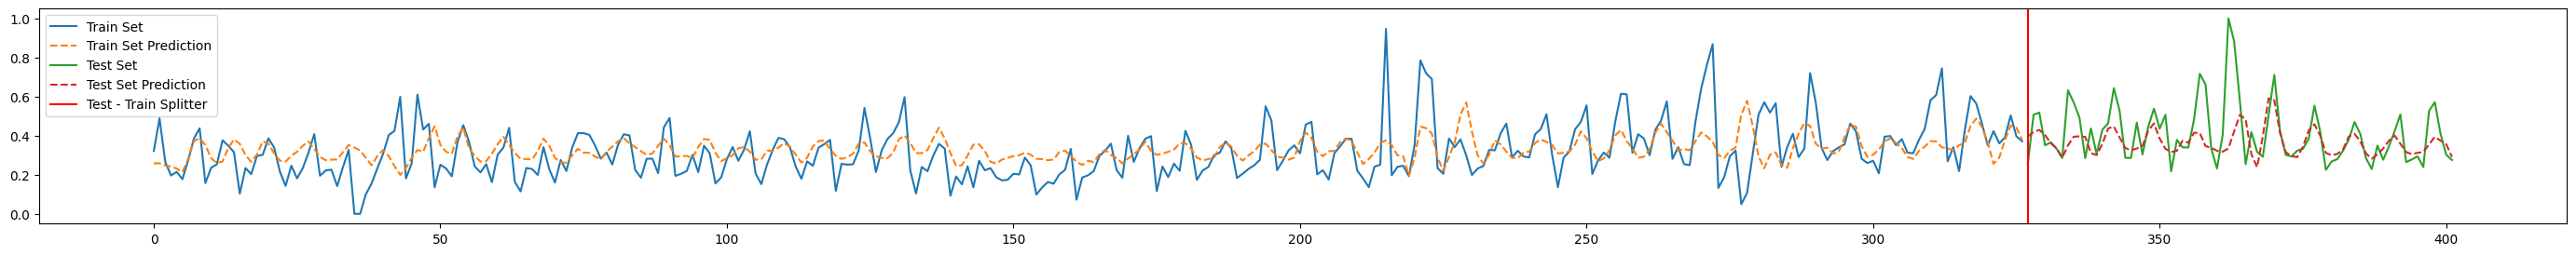

In [10]:
plt.figure(figsize=(35,3))
plt.plot(Yt)
plt.plot(yhat_train, linestyle="--")
plt.plot(np.arange(len(Y))+len(Yt), Y)
plt.plot(np.arange(len(Y))+len(Yt), yhat, linestyle="--")
plt.axvline(x=len(Yt), color="red")
plt.legend(["Train Set", "Train Set Prediction", "Test Set", "Test Set Prediction", "Test - Train Splitter"])

image_name = uuid.uuid1().__str__()
outputExperiment("experiment_1", "AR_LinearRegression", error, offset, 1, image_name)
plt.savefig("timesynth_experiment/"+image_name)

### AR Support Vector Linear Regression

In [11]:
import warnings
warnings.filterwarnings('ignore')
ar_svr_linear_regression, ar_svr_linear_regression_parameters, ar_svr_linear_regression_loss = Use_ARSupportVectorRegressionLinear().__execute__(series = series, goal=goal)
ar_svr_linear_regression_loss = f'{ar_svr_linear_regression_loss:.5f}'
fl = ar_svr_linear_regression_parameters['feature_length']
c = ar_svr_linear_regression_parameters['C']
epsilon = ar_svr_linear_regression_parameters['epsilon']
fit_intercept = ar_svr_linear_regression_parameters['fit_intercept']
print("RMSE:", ar_svr_linear_regression_loss)
print("AR LAG VARIABLES SIZE:", fl)
print("C:", c)
print("EPSILON:", epsilon)
print("FIT_INTERCEPT:", fit_intercept)

RMSE: 0.13443
AR LAG VARIABLES SIZE: 8
C: 1
EPSILON: 0.01
FIT_INTERCEPT: True


In [12]:
SWP = SlidingWindowPerformer(feature_length=fl, target_length=1, target_offset=offset)
_, Xt, Yt = SWP.get(series)
_, X, Y = SWP.get(test_series)
yhat_train = ar_svr_linear_regression.__test__(Xt)
yhat = ar_svr_linear_regression.__test__(X)
error = ForecastErrorEvaluation(goal = goal).get(Y, yhat)
print("RMSE:", error)

RMSE: 0.17945153476683368


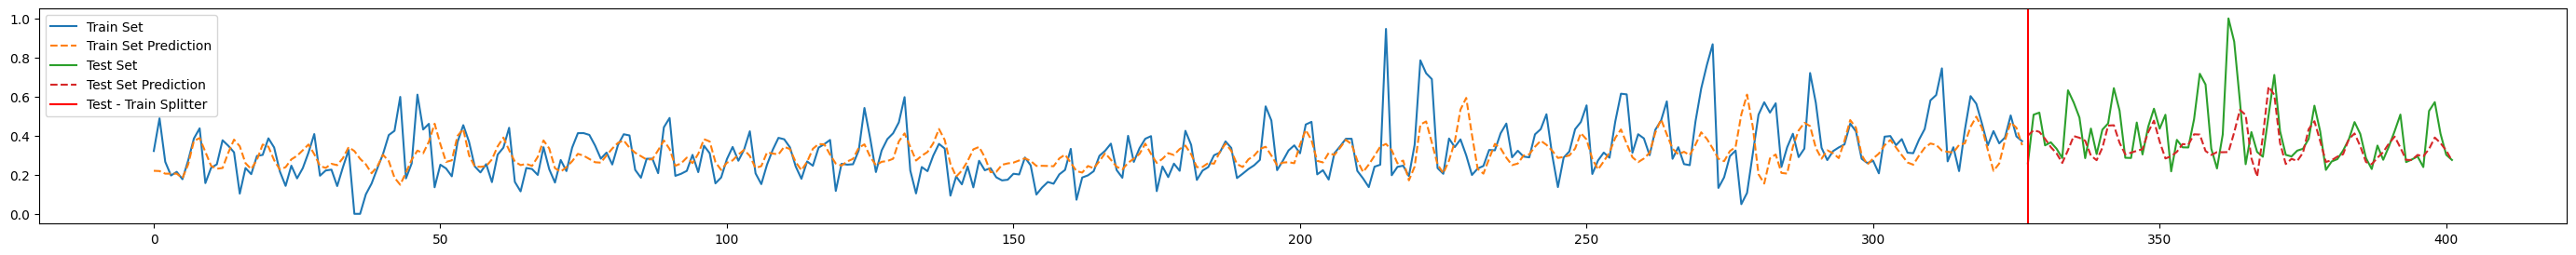

In [13]:
plt.figure(figsize=(35,3))
plt.plot(Yt)
plt.plot(yhat_train, linestyle="--")
plt.plot(np.arange(len(Y))+len(Yt), Y)
plt.plot(np.arange(len(Y))+len(Yt), yhat, linestyle="--")
plt.axvline(x=len(Yt), color="red")
plt.legend(["Train Set", "Train Set Prediction", "Test Set", "Test Set Prediction", "Test - Train Splitter"])

image_name = uuid.uuid1().__str__()
outputExperiment("experiment_1", "AR_Linear_SupportVectorRegression", error, offset, 1, image_name)
plt.savefig("timesynth_experiment/"+image_name)

### AR Support Vector RBF Regression

In [ ]:
import warnings
warnings.filterwarnings('ignore')
ar_svr_rbf_regression, ar_svr_rbf_regression_parameters, ar_svr_rbf_regression_loss = Use_ARSupportVectorRegressionRBF().__execute__(series = series, goal=goal)
ar_svr_rbf_regression_loss = f'{ar_svr_rbf_regression_loss:.5f}'
fl = ar_svr_rbf_regression_parameters['feature_length']
c = ar_svr_rbf_regression_parameters['C']
epsilon = ar_svr_rbf_regression_parameters['epsilon']
gamma = ar_svr_rbf_regression_parameters['gamma']
print("RMSE:", ar_svr_rbf_regression_loss)
print("AR LAG VARIABLES SIZE:", fl)
print("C:", c)
print("EPSILON:", epsilon)
print("GAMMA:", gamma)

In [ ]:
SWP = SlidingWindowPerformer(feature_length=fl, target_length=1, target_offset=offset)
_, Xt, Yt = SWP.get(series)
_, X, Y = SWP.get(test_series)
yhat_train = ar_svr_rbf_regression.__test__(Xt)
yhat = ar_svr_rbf_regression.__test__(X)
error = ForecastErrorEvaluation(goal = goal).get(Y, yhat)
print("RMSE:", error)

In [ ]:
plt.figure(figsize=(35,3))
plt.plot(Yt)
plt.plot(yhat_train, linestyle="--")
plt.plot(np.arange(len(Y))+len(Yt), Y)
plt.plot(np.arange(len(Y))+len(Yt), yhat, linestyle="--")
plt.axvline(x=len(Yt), color="red")
plt.legend(["Train Set", "Train Set Prediction", "Test Set", "Test Set Prediction", "Test - Train Splitter"])

image_name = uuid.uuid1().__str__()
outputExperiment("experiment_1", "AR_RBF_SupportVectorRegression", error, offset, 1, image_name)
plt.savefig("timesynth_experiment/"+image_name)

### AR Multi Layer Perceptron

In [14]:
ar_mlp_nn, ar_mlp_nn_parameters, ar_mlp_nn_loss = Use_ARMultiLayerPerceptronNeuralNetwork().__execute__(series = series, goal=goal)
ar_mlp_nn_loss = f'{ar_mlp_nn_loss:.5f}'
fl = ar_mlp_nn_parameters['feature_length']
print("RMSE:", ar_mlp_nn_loss)
print("AR LAG VARIABLES SIZE:", fl)

RMSE: 0.13323
AR LAG VARIABLES SIZE: 8


In [15]:
ar_mlp_nn.eval()
with torch.no_grad():
    SWP = SlidingWindowPerformer(feature_length=fl, target_length=1, target_offset=offset)
    _, Xt, Yt = SWP.get(series)
    _, X, Y = SWP.get(test_series)
    yhat_train = ar_mlp_nn(torch.tensor(Xt))
    yhat = ar_mlp_nn(torch.tensor(X))
    error = ForecastErrorEvaluation(goal = goal).get(torch.tensor(Y), yhat)
    print("RMSE:", error.item())

RMSE: 0.18151018023490906


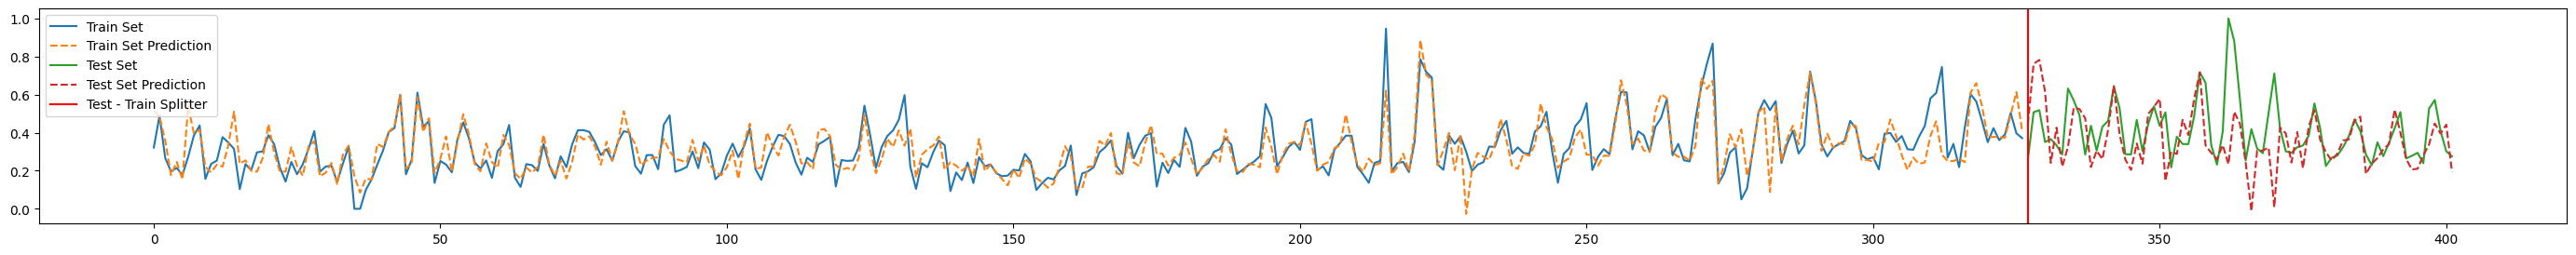

In [16]:
plt.figure(figsize=(35,3))
plt.plot(Yt)
plt.plot(yhat_train.detach().numpy(), linestyle="--")
plt.plot(np.arange(len(Y))+len(Yt), Y)
plt.plot(np.arange(len(Y))+len(Yt), yhat.detach().numpy(), linestyle="--")
plt.axvline(x=len(Yt), color="red")
plt.legend(["Train Set", "Train Set Prediction", "Test Set", "Test Set Prediction", "Test - Train Splitter"])

image_name = uuid.uuid1().__str__()
outputExperiment("experiment_1", "AR_NN_MultiLayerPerceptron", error, offset, 1, image_name)
plt.savefig("timesynth_experiment/"+image_name)

### AR Long Short Memory

In [17]:
ar_lstm_nn, ar_lstm_nn_parameters, ar_lstm_nn_loss = Use_ARLongShortTermMemoryNeuralNetwork().__execute__(series = series, goal=goal)
ar_lstm_nn_loss = f'{ar_lstm_nn_loss:.5f}'
fl = ar_lstm_nn_parameters['feature_length']
print("RMSE:", ar_lstm_nn_loss)
print("AR LAG VARIABLES SIZE:", fl)

0.18157272040843964 3
0.18410272896289825 4
0.15767966210842133 5
0.14895771443843842 6
0.14059478044509888 7
0.1898714303970337 8
0.17117837071418762 9
0.16509325802326202 10
RMSE: 0.14059
AR LAG VARIABLES SIZE: 7


In [18]:
ar_lstm_nn.eval()
with torch.no_grad():
    SWP = SlidingWindowPerformer(feature_length=fl, target_length=1, target_offset=offset)
    _, Xt, Yt = SWP.get(series)
    _, X, Y = SWP.get(test_series)
    yhat_train = ar_lstm_nn(torch.tensor(Xt))
    yhat = ar_lstm_nn(torch.tensor(X))
    error = ForecastErrorEvaluation(goal = goal).get(torch.tensor(Y), yhat)
    print("RMSE:", error.item())

RMSE: 0.2150208055973053


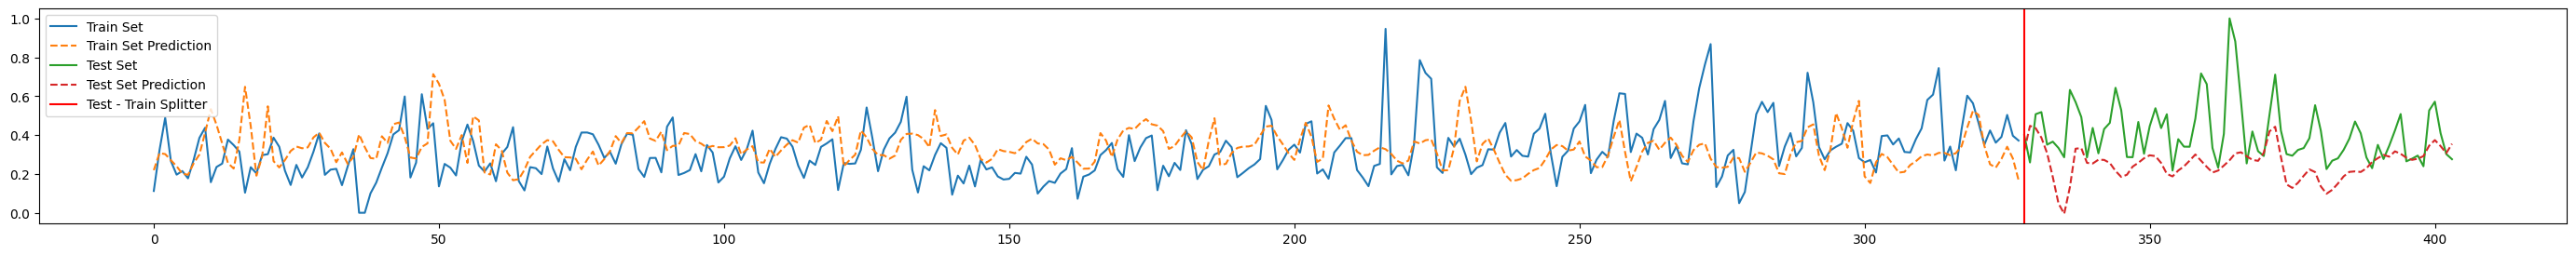

In [19]:
plt.figure(figsize=(35,3))
plt.plot(Yt)
plt.plot(yhat_train.detach().numpy(), linestyle="--")
plt.plot(np.arange(len(Y))+len(Yt), Y)
plt.plot(np.arange(len(Y))+len(Yt), yhat.detach().numpy(), linestyle="--")
plt.axvline(x=len(Yt), color="red")
plt.legend(["Train Set", "Train Set Prediction", "Test Set", "Test Set Prediction", "Test - Train Splitter"])

image_name = uuid.uuid1().__str__()
outputExperiment("experiment_1", "AR_NN_LongShortMemory", error, offset, 1, image_name)
plt.savefig("timesynth_experiment/"+image_name)

### AR Convolutional Neural Network

In [20]:
ar_cnn_nn, ar_cnn_nn_parameters, ar_cnn_nn_loss = Use_ARConvolutionalNeuralNetwork().__execute__(series = series, goal=goal)
ar_cnn_nn_loss = f'{ar_cnn_nn_loss:.5f}'
fl = ar_cnn_nn_parameters['feature_length']
print("RMSE:", ar_cnn_nn_loss)
print("AR LAG VARIABLES SIZE:", fl)

0.12355627864599228 3
0.16017019748687744 4
0.13557524979114532 5
0.1219281554222107 6
0.19003313779830933 7
0.12953871488571167 8
0.15378256142139435 9
0.14312800765037537 10
RMSE: 0.12193
AR LAG VARIABLES SIZE: 6


In [21]:
ar_cnn_nn.eval()
with torch.no_grad():
    SWP = SlidingWindowPerformer(feature_length=fl, target_length=1, target_offset=offset)
    _, Xt, Yt = SWP.get(series)
    _, X, Y = SWP.get(test_series)
    yhat_train = ar_cnn_nn(torch.tensor(Xt))
    yhat = ar_cnn_nn(torch.tensor(X))
    error = ForecastErrorEvaluation(goal = goal).get(torch.tensor(Y), yhat)
    print("RMSE:", error.item())

RMSE: 0.16878996789455414


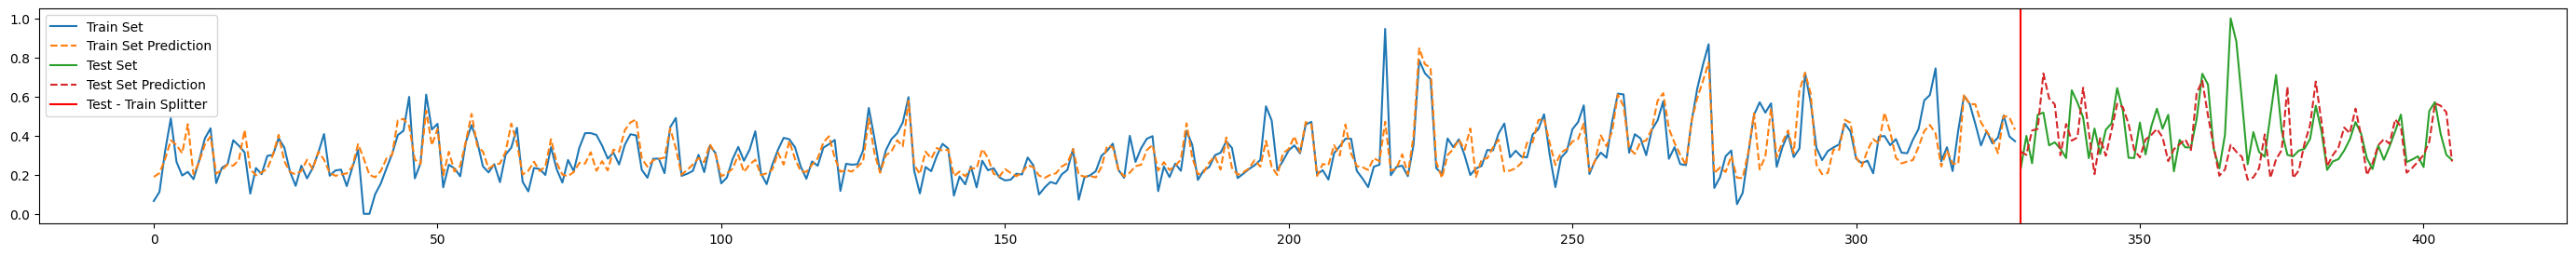

In [22]:
plt.figure(figsize=(35,3))
plt.plot(Yt)
plt.plot(yhat_train.detach().numpy(), linestyle="--")
plt.plot(np.arange(len(Y))+len(Yt), Y)
plt.plot(np.arange(len(Y))+len(Yt), yhat.detach().numpy(), linestyle="--")
plt.axvline(x=len(Yt), color="red")
plt.legend(["Train Set", "Train Set Prediction", "Test Set", "Test Set Prediction", "Test - Train Splitter"])

image_name = uuid.uuid1().__str__()
outputExperiment("experiment_1", "AR_NN_ConvolutionalNeuralNetwork", error, offset, 1, image_name)
plt.savefig("timesynth_experiment/"+image_name)

# One Shot Forecasting

In [23]:
offset = 1
view = 4
series = sd1
test_series = test_sd1
size = size_sd1
goal = OneShotForecastingGoal(offset=offset, view=view)

In [24]:
def RMSE_Loss(actual, predicted):
    """Root Mean Squared Error"""
    return np.sqrt(np.mean(np.square(actual - predicted)))

## Esecuzione del Framework

In [25]:
def RMSE_Loss_CUSTOM(actual, predicted):
    """Root Mean Squared Error"""
    new_actual = (MAX - MIN) * actual + MIN
    new_predicted = (MAX - MIN) * predicted + MIN
    return np.sqrt(np.mean(np.square(new_actual - new_predicted)))

### AR Linear Regression

In [26]:
ar_linear_regression, ar_linear_regression_parameters, ar_linear_regression_loss = Use_ARLinearRegression().__execute__(series = series, goal=goal)
ar_linear_regression_loss = f'{ar_linear_regression_loss:.5f}'
fl = ar_linear_regression_parameters['feature_length']
print("RMSE:", ar_linear_regression_loss)
print("AR LAG VARIABLES SIZE:", fl)

RMSE: 0.13299
AR LAG VARIABLES SIZE: 9


In [27]:
SWP = SlidingWindowPerformer(feature_length=fl, target_length=view, target_offset=offset)
_, Xt, Yt = SWP.get(series)
_, X, Y = SWP.get(test_series)
yhat_train = ar_linear_regression.__test__(Xt)
yhat = ar_linear_regression.__test__(X)

series_Yt = DataFrameToSeriesTransformer.transform(Yt)
series_yhat_train = DataFrameToSeriesTransformer.transform(yhat_train)
series_Y = DataFrameToSeriesTransformer.transform(Y)
series_yhat = DataFrameToSeriesTransformer.transform(yhat)
error = RMSE_Loss(np.array(series_Y), np.array(series_yhat))
print(error)

0.13536988938061476


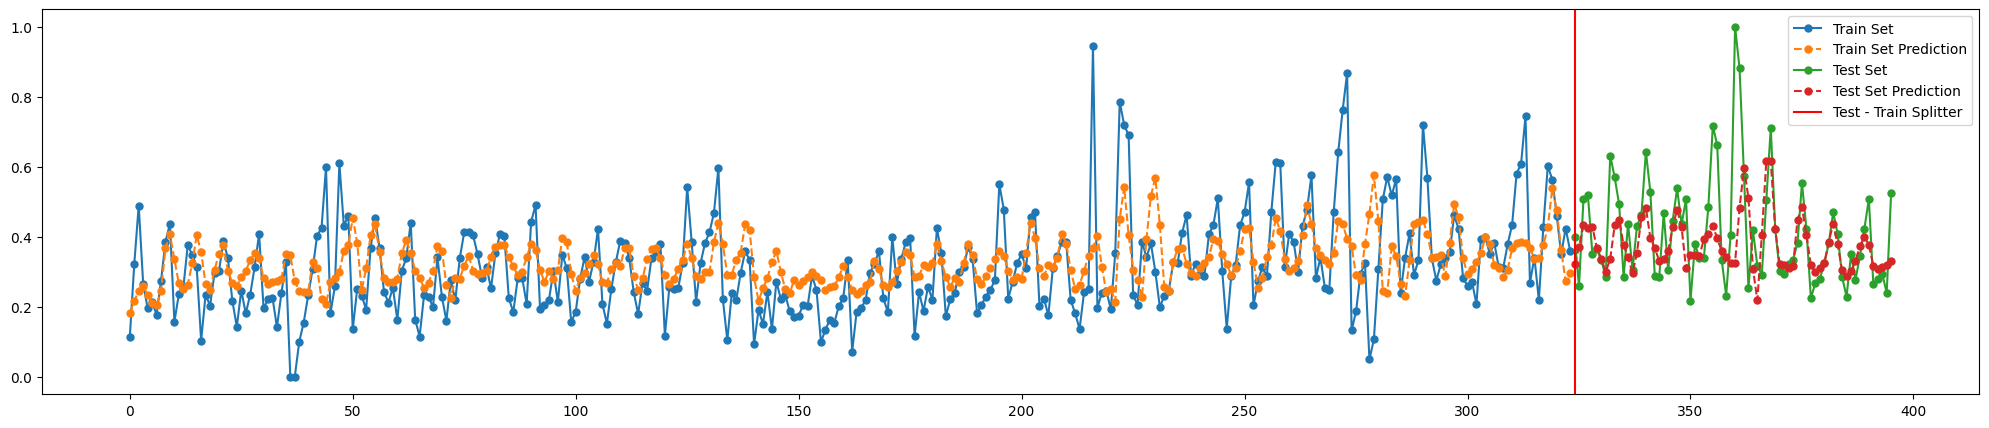

In [28]:
plt.figure(figsize=(25,5))
plt.plot(series_Yt, marker='o', markersize=5)
plt.plot(series_yhat_train, linestyle="--", marker='o', markersize=5)
plt.plot(np.arange(len(series_Y))+len(series_Yt), series_Y, marker='o', markersize=5)
plt.plot(np.arange(len(series_Y))+len(series_Yt), series_yhat, linestyle="--", marker='o', markersize=5)
plt.axvline(x=len(series_Yt), color="red")
plt.legend(["Train Set", "Train Set Prediction", "Test Set", "Test Set Prediction", "Test - Train Splitter"])

image_name = uuid.uuid1().__str__()
outputExperiment("experiment_1", "AR_LinearRegression", error, offset, view, image_name)
plt.savefig("timesynth_experiment/"+image_name)

### AR Multi Layer Perceptron

In [29]:
ar_mlp_nn, ar_mlp_nn_parameters, ar_mlp_nn_loss = Use_ARMultiLayerPerceptronNeuralNetwork().__execute__(series = series, goal=goal)
ar_mlp_nn_loss = f'{ar_mlp_nn_loss:.5f}'
fl = ar_mlp_nn_parameters['feature_length']
print("RMSE:", ar_mlp_nn_loss)
print("AR LAG VARIABLES SIZE:", fl)

RMSE: 0.12439
AR LAG VARIABLES SIZE: 7


In [31]:
ar_mlp_nn.eval()
with torch.no_grad():
    SWP = SlidingWindowPerformer(feature_length=fl, target_length=1, target_offset=offset)
    _, Xt, Yt = SWP.get(series)
    _, X, Y = SWP.get(test_series)
    yhat_train = ar_mlp_nn(torch.tensor(Xt))
    yhat = ar_mlp_nn(torch.tensor(X))
    error = ForecastErrorEvaluation(goal = goal).get(torch.tensor(Y), yhat)
    series_Yt = DataFrameToSeriesTransformer.transform(Yt)
    series_yhat_train = DataFrameToSeriesTransformer.transform(yhat_train.detach().numpy())
    series_Y = DataFrameToSeriesTransformer.transform(Y)
    series_yhat = DataFrameToSeriesTransformer.transform(yhat.detach().numpy())
    error = RMSE_Loss(np.array(series_Y), np.array(series_yhat))
    custom_error = RMSE_Loss_CUSTOM(np.array(series_Y), np.array(series_yhat))
    print(error)
    print("REAL", custom_error)

0.1463844
REAL 5566.9985


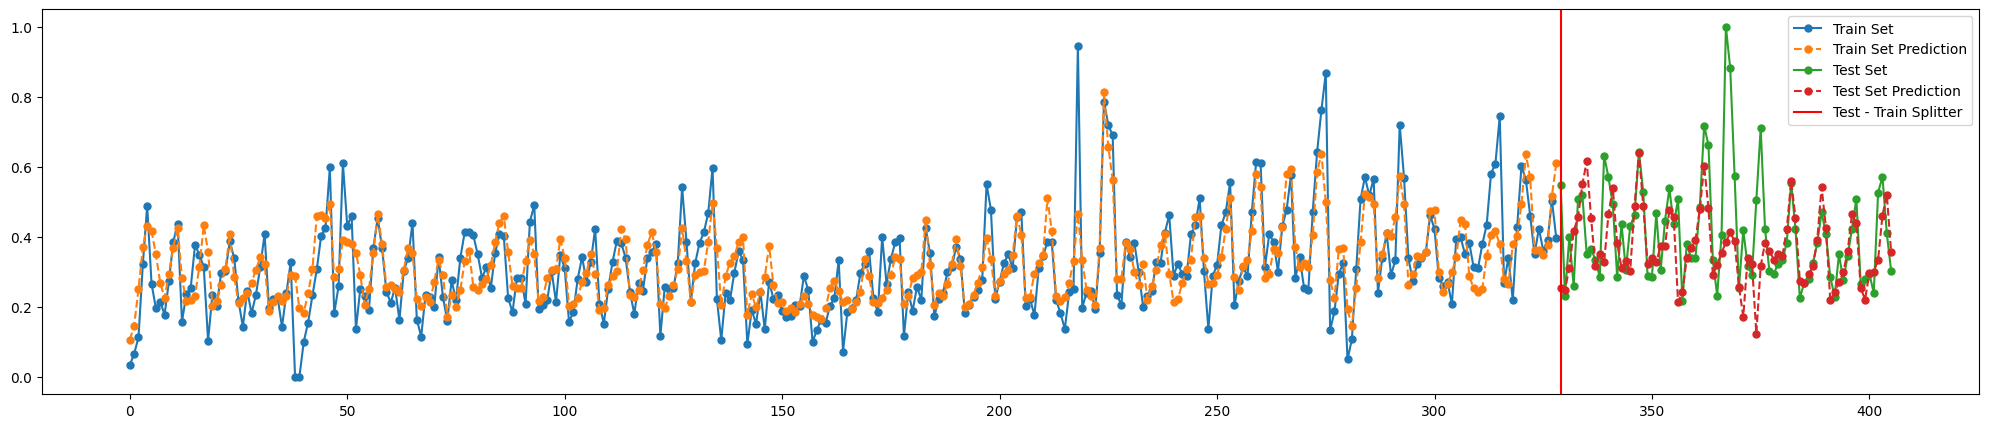

In [32]:
plt.figure(figsize=(25,5))
plt.plot(series_Yt, marker='o', markersize=5)
plt.plot(series_yhat_train, linestyle="--", marker='o', markersize=5)
plt.plot(np.arange(len(series_Y))+len(series_Yt), series_Y, marker='o', markersize=5)
plt.plot(np.arange(len(series_Y))+len(series_Yt), series_yhat, linestyle="--", marker='o', markersize=5)
plt.axvline(x=len(series_Yt), color="red")
plt.legend(["Train Set", "Train Set Prediction", "Test Set", "Test Set Prediction", "Test - Train Splitter"])

image_name = uuid.uuid1().__str__()
outputExperiment("experiment_1", "AR_NN_MultiLayerPerceptron", error, offset, view, image_name)
plt.savefig("timesynth_experiment/"+image_name)

### AR Convolutional Network

In [33]:
ar_cnn_nn, ar_cnn_nn_parameters, ar_cnn_nn_loss = Use_ARConvolutionalNeuralNetwork().__execute__(series = series, goal=goal)
ar_cnn_nn_loss = f'{ar_cnn_nn_loss:.5f}'
fl = ar_cnn_nn_parameters['feature_length']
print("RMSE:", ar_cnn_nn_loss)
print("AR LAG VARIABLES SIZE:", fl)

0.1342017948627472 3
0.14027565717697144 4
0.12625423073768616 5
0.1263607144355774 6
0.1115373894572258 7
0.12722665071487427 8
0.12392651289701462 9
0.1249534860253334 10
RMSE: 0.11154
AR LAG VARIABLES SIZE: 7


In [34]:
ar_cnn_nn.eval()
with torch.no_grad():
    SWP = SlidingWindowPerformer(feature_length=fl, target_length=1, target_offset=offset)
    _, Xt, Yt = SWP.get(series)
    _, X, Y = SWP.get(test_series)
    yhat_train = ar_cnn_nn(torch.tensor(Xt))
    yhat = ar_cnn_nn(torch.tensor(X))
    error = ForecastErrorEvaluation(goal = goal).get(torch.tensor(Y), yhat)
    series_Yt = DataFrameToSeriesTransformer.transform(Yt)
    series_yhat_train = DataFrameToSeriesTransformer.transform(yhat_train.detach().numpy())
    series_Y = DataFrameToSeriesTransformer.transform(Y)
    series_yhat = DataFrameToSeriesTransformer.transform(yhat.detach().numpy())
    error = RMSE_Loss(np.array(series_Y), np.array(series_yhat))
    print(error)

0.1403828


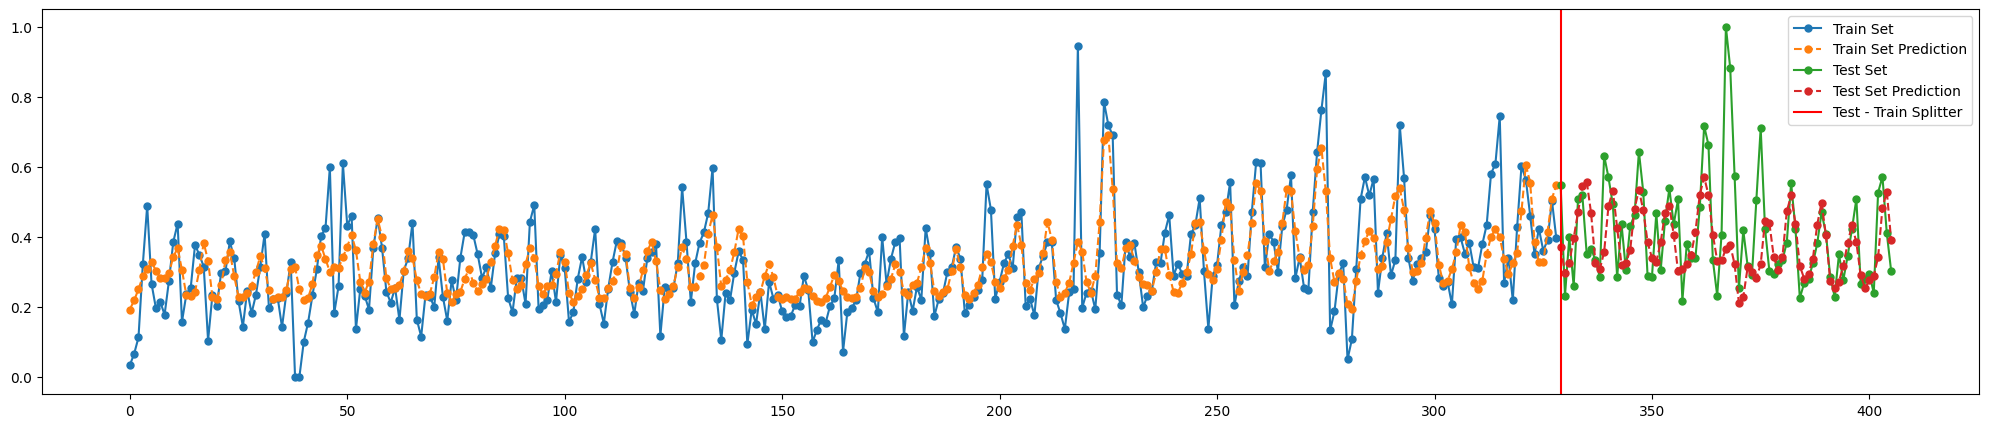

In [35]:
plt.figure(figsize=(25,5))
plt.plot(series_Yt, marker='o', markersize=5)
plt.plot(series_yhat_train, linestyle="--", marker='o', markersize=5)
plt.plot(np.arange(len(series_Y))+len(series_Yt), series_Y, marker='o', markersize=5)
plt.plot(np.arange(len(series_Y))+len(series_Yt), series_yhat, linestyle="--", marker='o', markersize=5)
plt.axvline(x=len(series_Yt), color="red")
plt.legend(["Train Set", "Train Set Prediction", "Test Set", "Test Set Prediction", "Test - Train Splitter"])

image_name = uuid.uuid1().__str__()
outputExperiment("experiment_1", "AR_NN_ConvolutionalNeuralNetwork", error, offset, view, image_name)
plt.savefig("timesynth_experiment/"+image_name)

### AR Long Short Term Memory

In [36]:
ar_lstm_nn, ar_lstm_nn_parameters, ar_lstm_nn_loss = Use_ARLongShortTermMemoryNeuralNetwork().__execute__(series = series, goal=goal)
ar_lstm_nn_loss = f'{ar_lstm_nn_loss:.5f}'
fl = ar_lstm_nn_parameters['feature_length']
print("RMSE:", ar_lstm_nn_loss)
print("AR LAG VARIABLES SIZE:", fl)

0.1819593459367752 3
0.1750272959470749 4
0.1495925784111023 5
0.16656233370304108 6
0.13312464952468872 7
0.1519414484500885 8
0.16892679035663605 9
0.17168493568897247 10
RMSE: 0.13312
AR LAG VARIABLES SIZE: 7


In [37]:
ar_lstm_nn.eval()
with torch.no_grad():
    SWP = SlidingWindowPerformer(feature_length=fl, target_length=1, target_offset=offset)
    _, Xt, Yt = SWP.get(series)
    _, X, Y = SWP.get(test_series)
    yhat_train = ar_lstm_nn(torch.tensor(Xt))
    yhat = ar_lstm_nn(torch.tensor(X))
    error = ForecastErrorEvaluation(goal = goal).get(torch.tensor(Y), yhat)
    series_Yt = DataFrameToSeriesTransformer.transform(Yt)
    series_yhat_train = DataFrameToSeriesTransformer.transform(yhat_train.detach().numpy())
    series_Y = DataFrameToSeriesTransformer.transform(Y)
    series_yhat = DataFrameToSeriesTransformer.transform(yhat.detach().numpy())
    error = RMSE_Loss(np.array(series_Y), np.array(series_yhat))
    print(error)

0.14120415


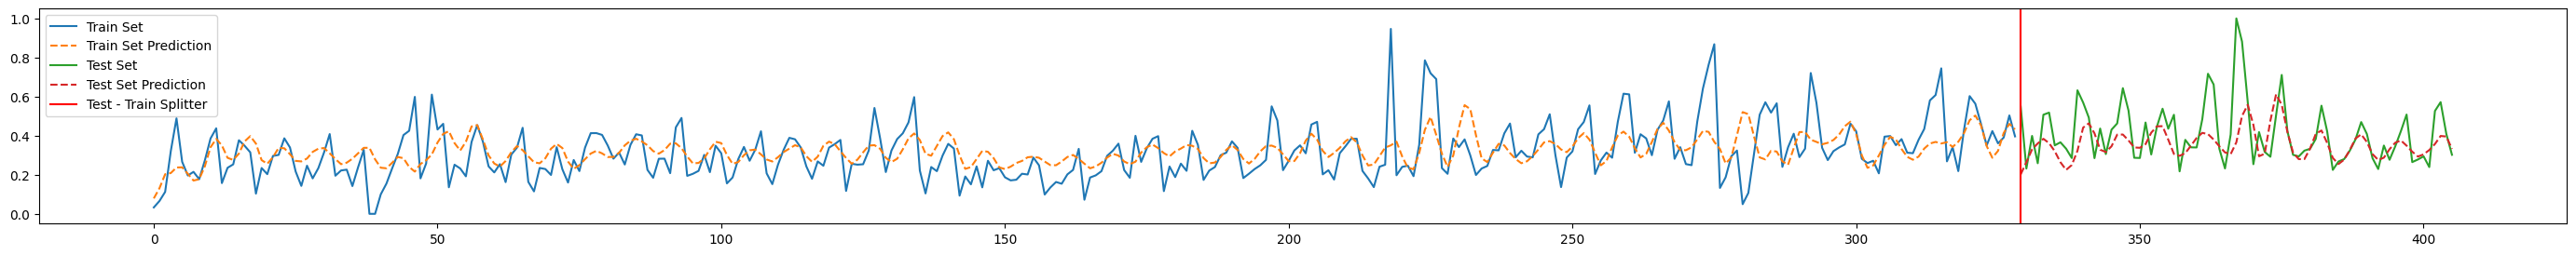

In [38]:
plt.figure(figsize=(35,3))
plt.plot(series_Yt)
plt.plot(series_yhat_train, linestyle="--")
plt.plot(np.arange(len(series_Y))+len(series_Yt), series_Y)
plt.plot(np.arange(len(series_Y))+len(series_Yt), series_yhat, linestyle="--")
plt.axvline(x=len(series_Yt), color="red")
plt.legend(["Train Set", "Train Set Prediction", "Test Set", "Test Set Prediction", "Test - Train Splitter"])

image_name = uuid.uuid1().__str__()
outputExperiment("experiment_1", "AR_NN_LongShortMemory", error, offset, view, image_name)
plt.savefig("timesynth_experiment/"+image_name)